#### Importing Libraries and Dependencies


In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Data preprocessing

##### Training Image Preprocessing

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 189661 files belonging to 107 classes.


##### Validation Image Preprocessing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 50125 files belonging to 107 classes.


In [5]:
for x, y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[161.25       162.25       183.25      ]
   [163.25       164.25       185.25      ]
   [164.25       165.25       186.25      ]
   ...
   [149.25       149.25       177.25      ]
   [128.75       128.75       156.75      ]
   [143.25       143.25       171.25      ]]

  [[155.25       155.25       179.25      ]
   [162.         162.         186.        ]
   [163.         163.         187.        ]
   ...
   [134.         134.         162.        ]
   [142.5        142.5        170.5       ]
   [143.25       143.25       171.25      ]]

  [[162.         162.         186.        ]
   [160.         160.         184.        ]
   [160.75       160.75       184.75      ]
   ...
   [128.5        128.5        156.5       ]
   [139.75       139.75       167.75      ]
   [146.         146.         174.        ]]

  ...

  [[145.75       145.75       172.25      ]
   [149.         146.         173.        ]
   [151.         148.5        173.5       ]
   ...
   [149.5        141.5  

#### Building Model

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

##### Building Convolution layer

In [8]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(128, 128, 3), padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [9]:
model.add(Conv2D(filters=64, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [10]:
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [11]:
model.add(Conv2D(filters=256, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [12]:
model.add(Conv2D(filters=512, kernel_size=3, activation='relu', padding='same', input_shape=(128, 128, 3)))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [13]:
# model.add(Dropout(0.25)) # 25% of neurons will be turned off randomly during each epoch | to avoid overfitting

In [14]:
model.add(Flatten())

In [21]:
model.add(Dense(units=1500, activation='relu'))

In [22]:
# model.add(Dropout(0.4)) # 40% of neurons will be turned off randomly during each epoch | to avoid overfitting

##### Output Layer

In [23]:
model.add(Dense(units=107, activation='softmax'))

##### Compiling Model

In [24]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

#### Training Model

In [26]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)


Epoch 1/10
5927/5927 [==============================] - 714s 120ms/step - loss: 0.8443 - accuracy: 0.8365 - val_loss: 0.4703 - val_accuracy: 0.8544
Epoch 2/10
5927/5927 [==============================] - 721s 122ms/step - loss: 0.3606 - accuracy: 0.8744 - val_loss: 0.3714 - val_accuracy: 0.8728
Epoch 3/10
5927/5927 [==============================] - 717s 121ms/step - loss: 0.3243 - accuracy: 0.8804 - val_loss: 0.3509 - val_accuracy: 0.8775
Epoch 4/10
5927/5927 [==============================] - 716s 121ms/step - loss: 0.3001 - accuracy: 0.8866 - val_loss: 0.3559 - val_accuracy: 0.8782
Epoch 5/10
5927/5927 [==============================] - 2035s 343ms/step - loss: 0.2843 - accuracy: 0.8900 - val_loss: 0.4021 - val_accuracy: 0.8689
Epoch 6/10
5927/5927 [==============================] - 2808s 474ms/step - loss: 0.2729 - accuracy: 0.8933 - val_loss: 0.3975 - val_accuracy: 0.8692
Epoch 7/10
5927/5927 [==============================] - 2892s 488ms/step - loss: 0.2600 - accuracy: 0.8960 - v

#### Model Evaluation

##### On Training set

In [27]:
train_loss, train_acc = model.evaluate(training_set)

5927/5927 [==============================] - 1534s 259ms/step - loss: 0.2348 - accuracy: 0.9031


In [28]:
print(train_loss, train_acc)

0.2348436564207077 0.9030691385269165


##### On Evaluation set

In [29]:
val_loss, val_acc = model.evaluate(validation_set)

1567/1567 [==============================] - 475s 303ms/step - loss: 0.3632 - accuracy: 0.8784


In [30]:
print(val_loss, val_acc)

0.3632376790046692 0.8784438967704773


#### Saving Model

In [31]:
model.save('trained_model.keras')

In [32]:
training_history.history

{'loss': [0.8443140983581543,
  0.3606488108634949,
  0.3243454098701477,
  0.3001316785812378,
  0.28428220748901367,
  0.2728841006755829,
  0.26001879572868347,
  0.2520863711833954,
  0.246332585811615,
  0.2380245178937912],
 'accuracy': [0.8365135788917542,
  0.8743547797203064,
  0.8803602457046509,
  0.8866240382194519,
  0.8900353908538818,
  0.8932622075080872,
  0.8960355520248413,
  0.8980180621147156,
  0.8998528718948364,
  0.9018459320068359],
 'val_loss': [0.4702591896057129,
  0.3714429438114166,
  0.3509068787097931,
  0.35585176944732666,
  0.4021010100841522,
  0.3974995017051697,
  0.3227478265762329,
  0.34836873412132263,
  0.3279188275337219,
  0.36323726177215576],
 'val_accuracy': [0.8543640971183777,
  0.8727580904960632,
  0.8775261640548706,
  0.8782244324684143,
  0.868867814540863,
  0.8692269325256348,
  0.8845486044883728,
  0.8777855634689331,
  0.8838503956794739,
  0.8784438967704773]}

#### Recording History
JSON format

In [33]:
import json
with open('training_history.json', 'w') as f:
    json.dump(str(training_history.history), f)

#### Accuracy Visualization

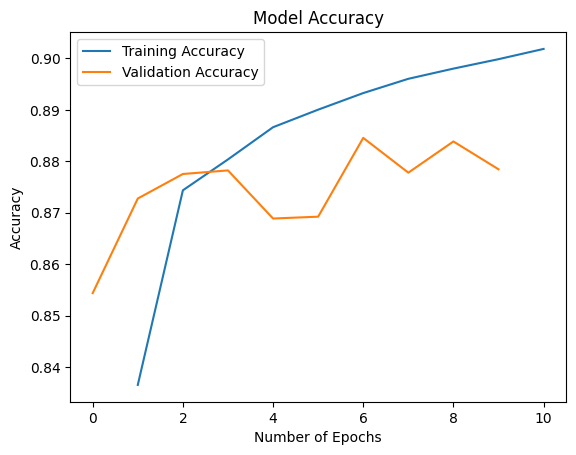

In [34]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

#### Some other metrics of model evaluation

In [35]:
class_names = validation_set.class_names
class_names

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Apple___rust',
 'Apple___scab',
 'Blueberry___healthy',
 'Cassava___bacterial_blight',
 'Cassava___brown_streak_disease',
 'Cassava___green_mottle',
 'Cassava___healthy',
 'Cassava___mosaic_disease',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Cherry___healthy',
 'Cherry___powdery_mildew',
 'Chili___healthy',
 'Chili___leaf curl',
 'Chili___leaf spot',
 'Chili___whitefly',
 'Chili___yellowish',
 'Coffee___cercospora_leaf_spot',
 'Coffee___healthy',
 'Coffee___red_spider_mite',
 'Coffee___rust',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Corn___common_rust',
 'Corn___gray_leaf_spot',
 'Corn___healthy',
 'Corn___northern_leaf_blight',
 'Cucumber___diseased',
 'Cucumber___healthy',
 'Gauva___diseased',
 'Gauva___healthy',
 'Grape___Black_rot',

In [36]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 50125 files belonging to 107 classes.


In [37]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

1567/1567 [==============================] - 265s 169ms/step


(array([[9.9543697e-01, 2.9352916e-05, 5.7784541e-06, ..., 1.3920305e-07,
         1.6409651e-09, 5.5885742e-08],
        [9.9543697e-01, 2.9352916e-05, 5.7784541e-06, ..., 1.3920305e-07,
         1.6409651e-09, 5.5885742e-08],
        [9.9845099e-01, 2.8033977e-05, 4.8364072e-06, ..., 7.1885026e-08,
         8.7088869e-10, 3.0116375e-08],
        ...,
        [3.6376333e-04, 1.5689171e-04, 2.2397283e-03, ..., 7.6114237e-02,
         1.2387412e-03, 6.9033182e-01],
        [1.1568812e-02, 2.1800546e-03, 5.8392216e-03, ..., 1.0266853e-02,
         2.2965306e-03, 4.3362513e-02],
        [1.9228278e-06, 6.2344401e-07, 3.1344089e-06, ..., 5.2317337e-04,
         5.6647503e-05, 9.9414164e-01]], dtype=float32),
 (50125, 107))

In [38]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(50125,), dtype=int64, numpy=array([  0,   0,   0, ..., 106,  91, 106], dtype=int64)>

In [39]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(50125, 107), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [40]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(50125,), dtype=int64, numpy=array([  0,   0,   0, ..., 106, 106, 106], dtype=int64)>

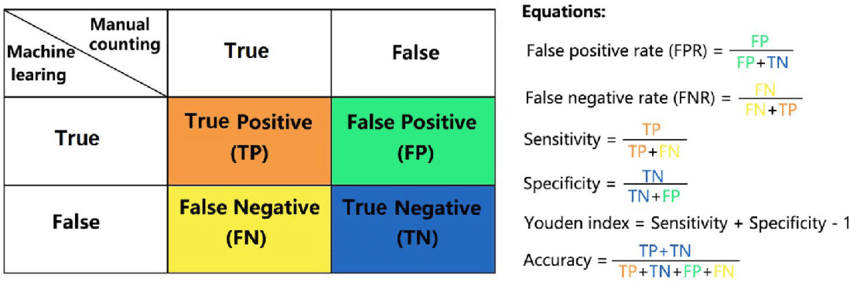

In [41]:
from sklearn.metrics import confusion_matrix, classification_report 

In [42]:
print(classification_report(Y_true, predicted_categories, target_names=class_names))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.88      0.96      0.92      1008
                                 Apple___Black_rot       1.00      0.99      0.99      1099
                          Apple___Cedar_apple_rust       0.91      0.97      0.94       880
                                   Apple___healthy       0.85      1.00      0.92      1274
                                      Apple___rust       0.10      0.03      0.04        72
                                      Apple___scab       0.00      0.00      0.00       140
                               Blueberry___healthy       0.98      0.95      0.97       908
                        Cassava___bacterial_blight       0.34      0.50      0.40        98
                    Cassava___brown_streak_disease       0.38      0.19      0.25       112
                            Cassava___green_mottle       0.32      0.31      0.

c:\Users\abhas\anaconda3\envs\epics_project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhas\anaconda3\envs\epics_project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\abhas\anaconda3\envs\epics_project\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [43]:
cm = confusion_matrix(Y_true, predicted_categories)
cm

array([[ 964,    4,    4, ...,    0,    0,    0],
       [   2, 1083,    0, ...,    0,    0,    0],
       [   0,    0,  854, ...,    0,    0,    0],
       ...,
       [   0,    0,    0, ...,  231,    0,    3],
       [   0,    0,    0, ...,    0,   20,    0],
       [   0,    0,    0, ...,    3,    2,  211]], dtype=int64)

#### Confusion Matix Visualization

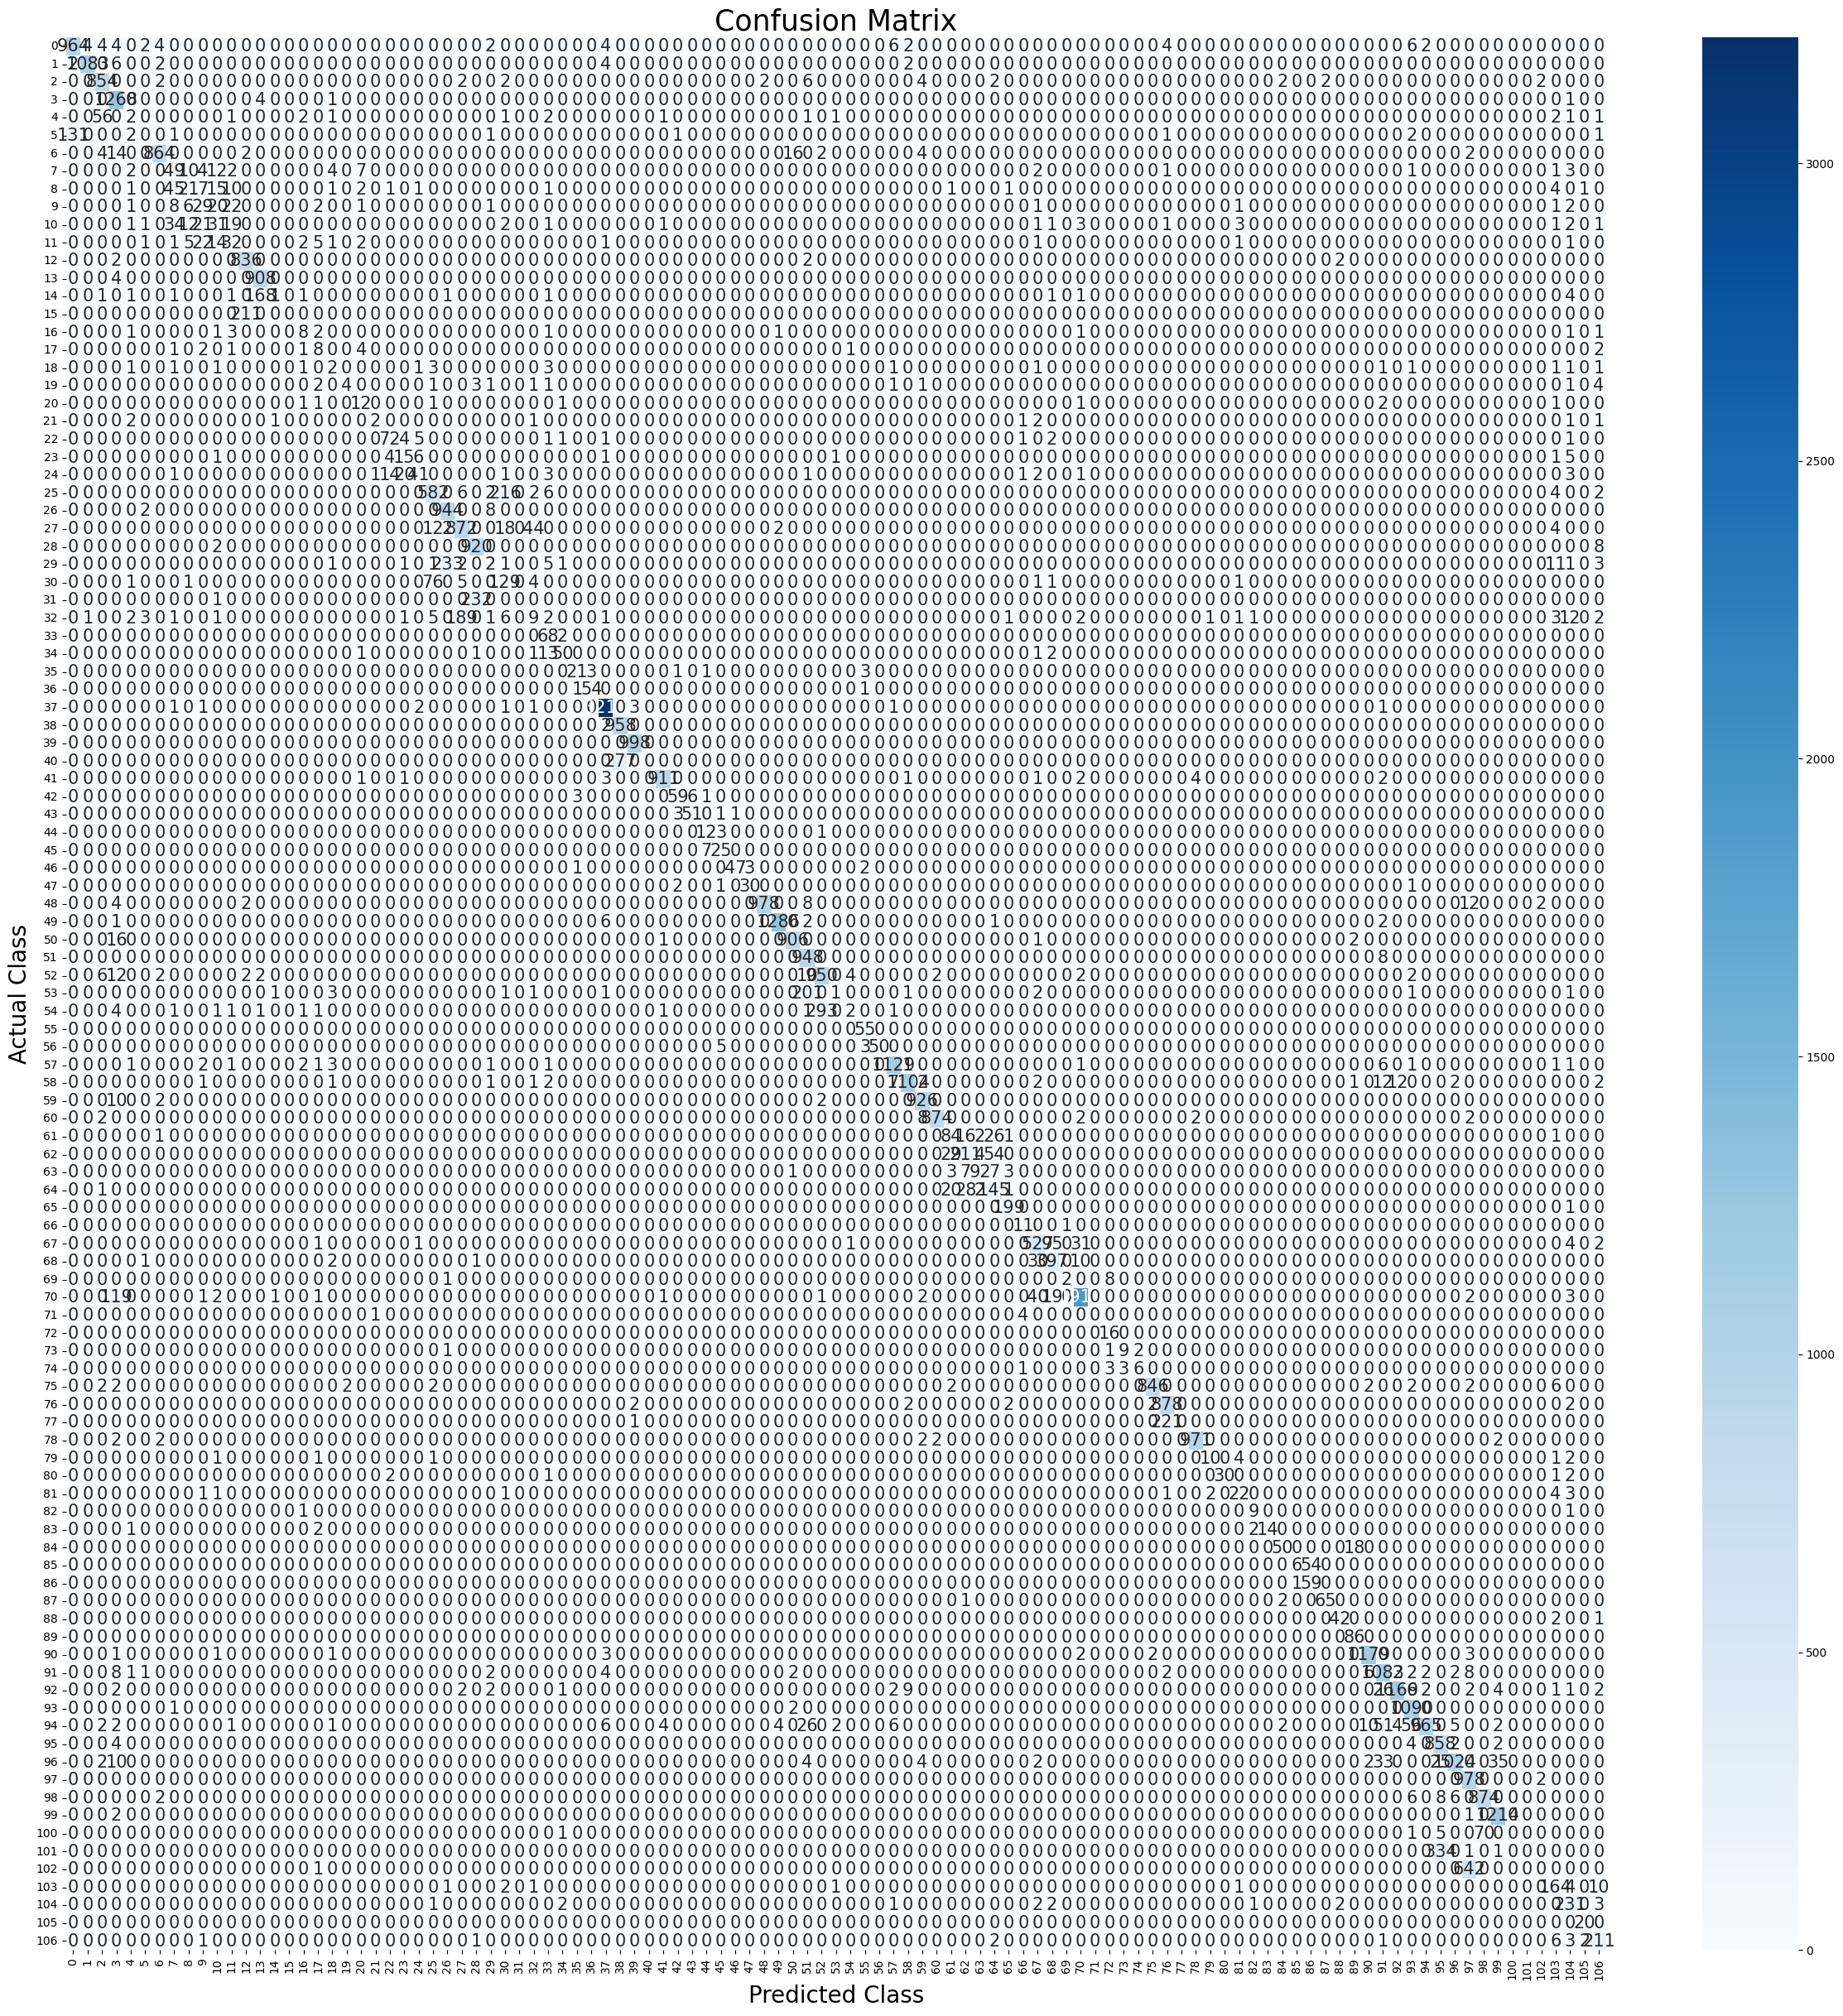

In [46]:
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, annot_kws={'size': 15}, fmt='d', cmap='Blues')
plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Confusion Matrix', fontsize=25)
plt.show()